In [1]:
import numpy as np
import scipy as sc
import scipy.fft as scfft
import matplotlib.pyplot as plt
import uproot

In [2]:
%%capture out
%run ./Functions.ipynb

# Import data

In [3]:
FileSt11R101=uproot.open("/mnt/c/Users/Jethro/Desktop/Master thesis/pedestal.root")
FileSt11R101[''].show(  name_width=22, typename_width=24, interpretation_width=30)

name                   | typename                 | interpretation                
-----------------------+--------------------------+-------------------------------
                       | mattak::Pedestals        | AsGroup(<TBranchElement '' ...
/TObject               | (group of fUniqueID:u... | AsGroup(<TBranchElement 'TO...
/TObject/fUniqueID     | uint32_t                 | AsDtype('>u4')
/TObject/fBits         | uint8_t                  | AsDtype('uint8')
/when                  | uint32_t                 | AsDtype('>u4')
/nevents               | uint32_t                 | AsDtype('>u4')
/mask                  | uint32_t                 | AsDtype('>u4')
/flags                 | uint8_t                  | AsDtype('uint8')
/station_number        | uint8_t                  | AsDtype('uint8')
/vbias[2]              | float[2]                 | AsDtype("('>f4', (2,))")
/pedestals[24][4096]   | uint16_t[24][4096]       | AsDtype("('>u2', (24, 4096))")


In [4]:
RadFileSt11R101=uproot.open("/mnt/c/Users/Jethro/Desktop/Master thesis/RNO_DATA_DIR/station11/run101/combined.root") #When from ubuntu
RadiantDataSt11R101=RadFileSt11R101['combined']['waveforms']['radiant_data[24][2048]'].array(library='np')
EventNrsSt11R101=RadFileSt11R101['combined']['waveforms']['event_number'].array(library="np")

PedestalDataSt11R101=FileSt11R101['']['pedestals[24][4096]'].array(library='np')
print("The shape is: " + str(PedestalDataSt11R101.shape)) # 24 channels & 4096 samples
print(PedestalDataSt11R101[0])
#np.where(EventNumber==18)[0][0]

The shape is: (1, 24, 4096)
[[2524 2532 2519 ... 2548 2534 2543]
 [2533 2517 2520 ... 2548 2533 2531]
 [2485 2491 2488 ... 2524 2495 2497]
 ...
 [2474 2501 2502 ... 2514 2530 2490]
 [2500 2526 2501 ... 2529 2520 2511]
 [2521 2526 2497 ... 2543 2529 2506]]


### Plot of the pedestal values

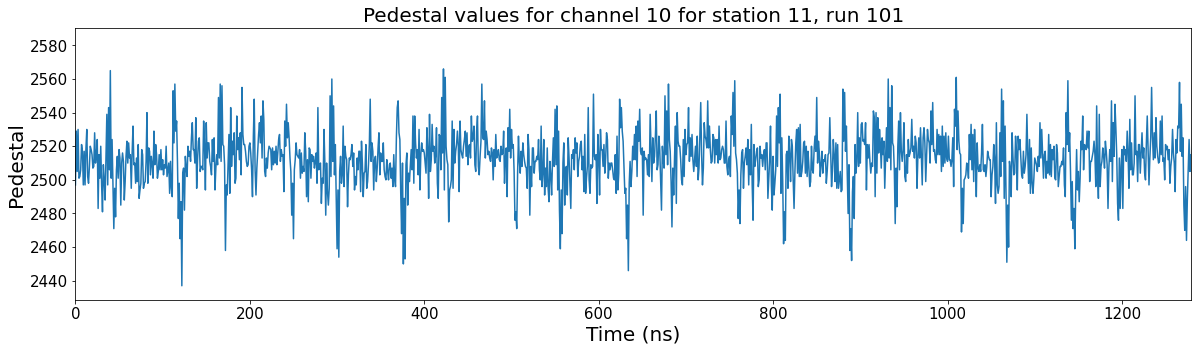

In [5]:
PedPlot(10,PedestalDataSt11R101)